In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
dataset=pd.read_excel("airquality.xlsx")
dataset.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [4]:
dataset.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [5]:
S1 = dataset['PT08.S1(CO)'].fillna(dataset['PT08.S1(CO)'].mean())
S2 = dataset['PT08.S2(NMHC)'].fillna(dataset['PT08.S1(CO)'].mean())
S3 = dataset['PT08.S3(NOx)'].fillna(dataset['PT08.S1(CO)'].mean())
S4 = dataset['PT08.S4(NO2)'].fillna(dataset['PT08.S1(CO)'].mean())
S5 = dataset['PT08.S5(O3)'].fillna(dataset['PT08.S1(CO)'].mean())
AH = dataset["AH"].fillna(dataset["AH"].mean())

In [6]:
new_data=pd.DataFrame({'S1': S1, 'S2': S2, 'S3': S3, 'S4': S4, 'S5':S5,'AH':AH})
new_data

,S1,S2,S3,S4,S5,AH
0,1360.00,1045.50,1056.25,1692.00,1267.50,0.757754
1,1292.25,954.75,1173.75,1558.75,972.25,0.725487
2,1402.00,939.25,1140.00,1554.50,1074.00,0.750239
3,1375.50,948.25,1092.00,1583.75,1203.25,0.786713
4,1272.25,835.50,1205.00,1490.00,1110.00,0.788794
...,...,...,...,...,...,...
9352,1314.25,1101.25,538.50,1374.25,1728.50,0.756824
9353,1162.50,1027.00,603.75,1263.50,1269.00,0.711864
9354,1142.00,1062.50,603.25,1240.75,1092.00,0.640649
9355,1002.50,960.50,701.50,1041.00,769.75,0.513866


In [7]:
import seaborn as sns

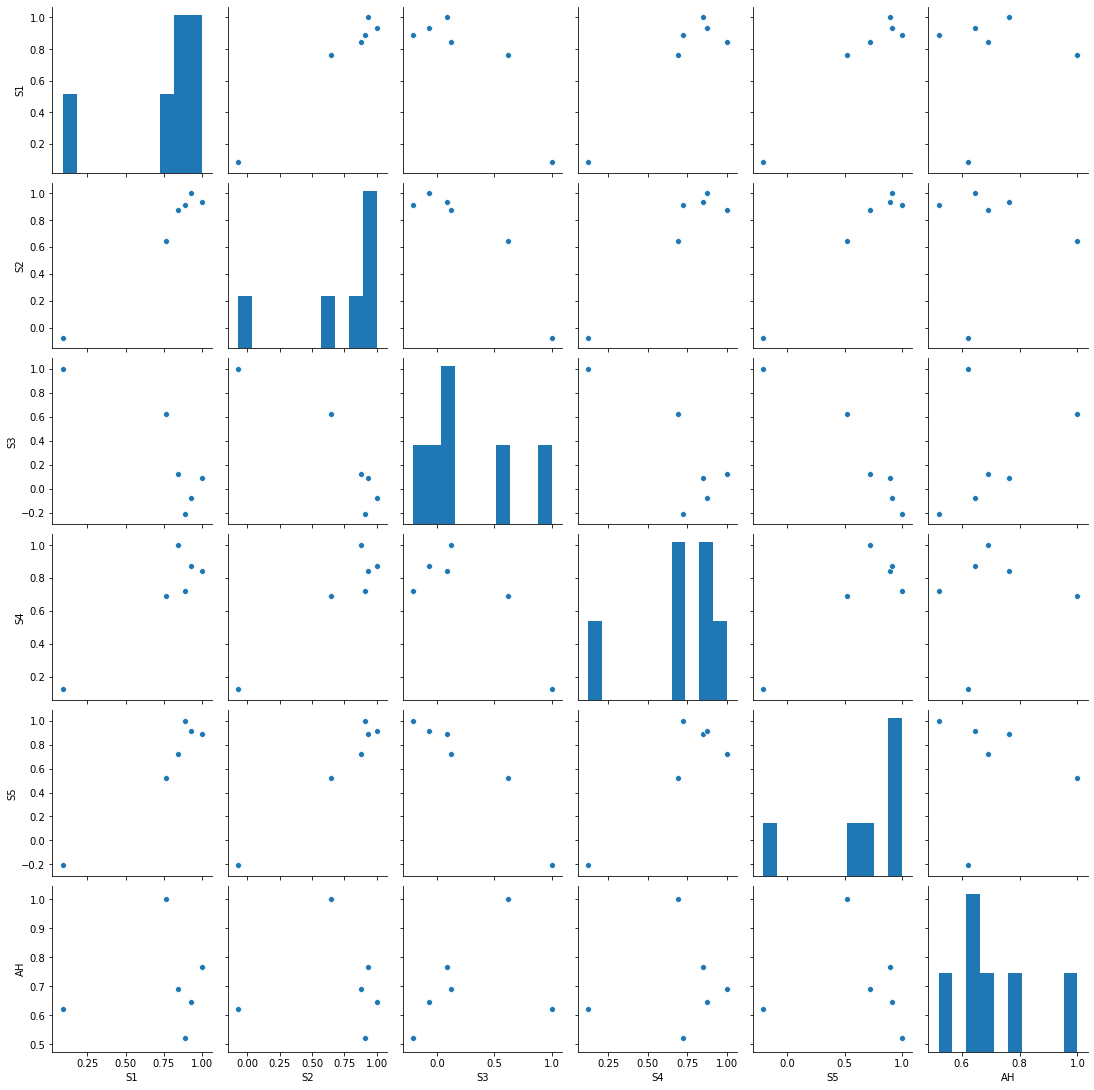

In [8]:
sns.pairplot(new_data.corr())

In [9]:
new_data

,S1,S2,S3,S4,S5,AH
0,1360.00,1045.50,1056.25,1692.00,1267.50,0.757754
1,1292.25,954.75,1173.75,1558.75,972.25,0.725487
2,1402.00,939.25,1140.00,1554.50,1074.00,0.750239
3,1375.50,948.25,1092.00,1583.75,1203.25,0.786713
4,1272.25,835.50,1205.00,1490.00,1110.00,0.788794
...,...,...,...,...,...,...
9352,1314.25,1101.25,538.50,1374.25,1728.50,0.756824
9353,1162.50,1027.00,603.75,1263.50,1269.00,0.711864
9354,1142.00,1062.50,603.25,1240.75,1092.00,0.640649
9355,1002.50,960.50,701.50,1041.00,769.75,0.513866


In [10]:
new_data.shape

(9357, 6)

In [11]:
x=new_data.iloc[:,:-1].values
x

array([[1360.  , 1045.5 , 1056.25, 1692.  , 1267.5 ],
       [1292.25,  954.75, 1173.75, 1558.75,  972.25],
       [1402.  ,  939.25, 1140.  , 1554.5 , 1074.  ],
       ...,
       [1142.  , 1062.5 ,  603.25, 1240.75, 1092.  ],
       [1002.5 ,  960.5 ,  701.5 , 1041.  ,  769.75],
       [1070.75, 1047.25,  654.  , 1128.5 ,  816.  ]])

In [12]:
y=new_data.iloc[:,-1].values
y

array([0.75775383, 0.72548745, 0.75023907, ..., 0.64064877, 0.51386592,
       0.50280371])

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
#from sklearn.preprocessing import StandardScaler

#sc_x = StandardScaler()

#x_train = sc_x.fit_transform(x_train)

#x_test = sc_x.transform(x_test)

In [15]:
x_train

array([[ 928.25,  630.75,  985.  ,  907.75,  884.  ],
       [ 929.  ,  810.5 ,  861.5 , 1541.  ,  641.75],
       [1238.75, 1128.75,  636.5 , 1838.75, 1308.  ],
       ...,
       [ 769.25,  585.5 , 1220.5 , 1133.75,  650.25],
       [1034.25,  811.75,  865.5 , 1563.25,  659.75],
       [1099.25, 1014.75,  763.  , 1731.5 ,  838.75]])

In [16]:
lr=LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('r2 score: {} '.format(lr.score(x_test,y_test)))

r2 score: 0.8965823714985447 


In [29]:
print('r2 score: {} '.format(lr.score(x_train,y_train)))

r2 score: 0.9011658872930197 


In [19]:
#lr.coef_

array([ 0.06995345,  0.02479456,  0.06934297, -0.00089376, -0.00676683])

In [30]:
from sklearn.model_selection import cross_val_score

In [41]:
score=cross_val_score(lr,x,y,cv=5)

In [42]:
score.mean()

0.797110035158975

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
KNR=KNeighborsRegressor(8)
KNR.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [44]:
KNR=KNR.predict(x_test)
KNR

array([0.73762355, 0.38911687, 1.18414923, ..., 0.96797464, 0.96313573,
       1.04845749])